# Electrode Microwave Region 5 rods Vacuum Chamber Windows

**Maxwell file**
```
Electric Field Rods Field Shaping Optimization - 5 Rods vacuum chamber - windows
```

![drawing](5rods_vacchamber_windows_drawing.PNG)

simulate potential and electric field for the configuration shown in the figure.  
The separation between left and right electrodes was varied as was the positioning of **R1** and **SEP1** and the voltage on SEP1, **Vsep**.   
The electric field inhomogeneity in the center rectangle was used as the cost function for minimization.

The microwaves are in the 10s GHz range, so I took a minimum separation beteween electrode rods of 3 cm, corresponding to 10 GHz.

  * electrode rods at $\pm$1000 V
  * center rods at 0 V
  * rod radius = 1 mm
  * boundary conditions are 0 V at the vacuum chamber  


In [1]:
def set_fontsize(ax, fs):
    """
    Function to set font sizes for axes objects
    """
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

## Parametric Sweep

In [2]:
from scipy.interpolate import griddata
import numpy as np
def generate_gridded_interpolate(x, y, data, method = 'cubic'):
    xi = np.linspace(x.min(), x.max(), 101)
    yi = np.linspace(y.min(), y.max(), 101)
    xx, yy = np.meshgrid(xi, yi)
    return xx, yy, griddata((x,y), data, xi = (xx,yy), method = method)


def string_to_num(df, colname, remove = False):
    if not remove:
        df[colname] = pd.to_numeric(df[colname]) 
    else:
        df[colname] = [float(val.strip(remove)) for val in df[colname].values]

In [3]:
import pandas as pd

data_dir = '../Data/Ansys/'

df_para = pd.read_csv(data_dir+'ParametricSetup1_Result_5rods_vacchamber_windows.csv')
string_to_num(df_para, '$R1', remove = 'mm')
string_to_num(df_para, '$R2', remove = 'mm')
string_to_num(df_para, '$SEP', remove = 'mm')
string_to_num(df_para, '$SEP2', remove = 'mm')
string_to_num(df_para, '$Vsep', remove = 'V')
df_para = df_para.rename(columns = {'fmin: None':'Cost'})
df_para.head()

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
0,1,30.0,40.0,30.0,30.0,200.0,0.097397
1,2,30.0,40.0,30.0,30.0,350.0,0.081469
2,3,30.0,40.0,30.0,30.0,500.0,0.067847
3,4,30.0,40.0,30.0,30.0,650.0,0.058123
4,5,30.0,40.0,30.0,30.0,800.0,0.048630


In [4]:
df_sorted = df_para.sort_values('Cost')

In [5]:
df_sorted.head(10)

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
2370,2371,50.0,40.0,80.0,80.0,200.0,0.000303
2501,2502,50.0,50.0,60.0,50.0,900.0,0.000411
1859,1860,40.0,70.0,60.0,60.0,900.0,0.000458
2751,2752,50.0,60.0,70.0,50.0,650.0,0.000498
2563,2564,50.0,50.0,80.0,40.0,350.0,0.000576
641,642,30.0,60.0,80.0,70.0,900.0,0.000632
3021,3022,50.0,70.0,80.0,80.0,650.0,0.000654
2779,2780,50.0,60.0,80.0,40.0,350.0,0.000701
2152,2153,40.0,80.0,80.0,70.0,800.0,0.000702
1031,1032,30.0,80.0,70.0,60.0,900.0,0.000735


In [6]:
df_filtered = df_sorted[(df_sorted['$SEP'] < 80) & (df_sorted['$SEP2'] < 80) & (df_sorted['$R1'] < 50) & (df_sorted['$Vsep'] <= 650)]
df_filtered.head(10)

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
1448,1449,40.0,50.0,70.0,40.0,500.0,0.001317
1629,1630,40.0,60.0,60.0,40.0,650.0,0.002006
2103,2104,40.0,80.0,70.0,50.0,650.0,0.002074
1881,1882,40.0,70.0,70.0,40.0,650.0,0.002091
1441,1442,40.0,50.0,70.0,30.0,350.0,0.002116
291,292,30.0,50.0,50.0,30.0,650.0,0.002198
1413,1414,40.0,50.0,60.0,40.0,650.0,0.002220
1154,1155,40.0,40.0,50.0,30.0,500.0,0.002678
1622,1623,40.0,60.0,60.0,30.0,500.0,0.003170
585,586,30.0,60.0,70.0,40.0,650.0,0.003320


Some of these values are too close to the window or wall, need to constrain some variables more.

In [7]:
df_para = pd.read_csv(data_dir+'ParametricSetup2_Result_5rods_vacchamber_windows.csv')
string_to_num(df_para, '$R1', remove = 'mm')
string_to_num(df_para, '$R2', remove = 'mm')
string_to_num(df_para, '$SEP', remove = 'mm')
string_to_num(df_para, '$SEP2', remove = 'mm')
string_to_num(df_para, '$Vsep', remove = 'V')
df_para = df_para.rename(columns = {'fmin: None':'Cost'})
df_para.head()

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
0,1,30.0,50.0,50.0,30.0,400.0,0.031499
1,2,30.0,50.0,50.0,30.0,500.0,0.018001
2,3,30.0,50.0,50.0,30.0,600.0,0.005208
3,4,30.0,50.0,50.0,30.0,700.0,0.006917
4,5,30.0,50.0,50.0,30.0,800.0,0.018342


In [8]:
df_sorted = df_para.sort_values('Cost')
df_sorted.head(10)

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
567,568,40.0,50.0,55.0,40.0,700.0,0.000588
80,81,30.0,50.0,70.0,40.0,600.0,0.000599
11,12,30.0,50.0,50.0,40.0,900.0,0.001053
619,620,40.0,50.0,70.0,40.0,500.0,0.001317
692,693,40.0,60.0,65.0,40.0,600.0,0.001365
683,684,40.0,60.0,60.0,50.0,900.0,0.001366
423,424,35.0,60.0,65.0,40.0,700.0,0.001588
431,432,35.0,60.0,65.0,50.0,900.0,0.001634
332,333,35.0,50.0,65.0,40.0,600.0,0.001676
171,172,30.0,60.0,70.0,40.0,700.0,0.001734


## Optimization

### **$SEP2** set to 40 mm

In [9]:
df_opt = pd.read_csv(data_dir+'OptimizationSetup1_Result_5rods_vacchamber_windows.csv')
string_to_num(df_opt, '$R1', remove = 'mm')
string_to_num(df_opt, '$R2', remove = 'mm')
string_to_num(df_opt, '$SEP', remove = 'mm')
string_to_num(df_opt, '$Vsep', remove = 'V')

In [10]:
df_sorted = df_opt.sort_values('Cost')
df_sorted.head(10)

,Evaluation,$R1,$R2,$SEP,$Vsep,Cost
70,71,39.305983,51.311622,54.522360,715.602188,3.888300e-07
66,67,39.305983,51.278045,54.522360,715.602188,3.888600e-07
73,74,39.305983,51.244469,54.522360,715.602188,3.908700e-07
61,62,39.305983,51.311955,54.522360,715.798997,3.994400e-07
55,56,39.305983,51.278045,54.522360,715.798997,4.015400e-07
65,66,39.305983,51.244136,54.522360,715.798997,4.029100e-07
63,64,39.305983,51.278045,54.522360,715.995807,4.098900e-07
53,54,39.310824,51.278045,54.526303,715.798997,4.528900e-07
56,57,39.310824,51.242782,54.522360,715.798997,4.543900e-07
83,84,39.305983,51.311622,54.522360,715.886722,4.544200e-07


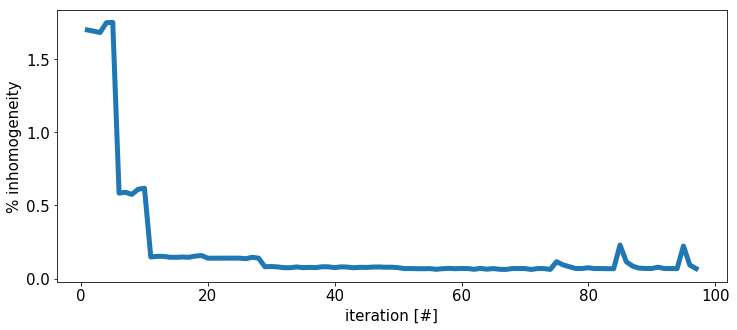

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(df_opt.Evaluation, np.sqrt(df_opt.Cost)*100, lw = 5)
set_fontsize(ax, 15)
ax.locator_params(axis = 'y', nbins = 5)
ax.set_xlabel('iteration [#]')
ax.set_ylabel('% inhomogeneity');

Parameters for which the inhomogeneity is minimized

In [12]:
df_opt.iloc[df_opt.Cost.idxmin()]

Evaluation    7.100000e+01
$R1           3.930598e+01
$R2           5.131162e+01
$SEP          5.452236e+01
$Vsep         7.156022e+02
Cost          3.888300e-07
Name: 70, dtype: float64

### **$SEP2** set to 35 mm
more space between window and electrode rod

In [13]:
df_opt = pd.read_csv(data_dir+'OptimizationSetup2_Result_5rods_vacchamber_windows.csv')
string_to_num(df_opt, '$R1', remove = 'mm')
string_to_num(df_opt, '$R2', remove = 'mm')
string_to_num(df_opt, '$SEP', remove = 'mm')
string_to_num(df_opt, '$Vsep', remove = 'V')

In [14]:
df_sorted = df_opt.sort_values('Cost')
df_sorted.head(10)

,Evaluation,$R1,$R2,$SEP,$Vsep,Cost
81,82,36.153259,62.039052,50.123288,802.304316,0.000006
73,74,36.167476,62.046403,50.125698,802.010792,0.000006
80,81,36.139090,62.044288,50.120886,802.596866,0.000006
71,72,36.167476,62.033799,50.125698,802.010792,0.000006
78,79,36.167476,62.033799,50.121421,802.010792,0.000006
64,65,36.171488,62.098029,50.145433,802.189599,0.000006
67,68,36.171488,62.098029,50.155364,802.189599,0.000006
72,73,36.172247,62.033799,50.125698,802.010792,0.000006
75,76,36.167476,62.033799,50.125698,802.145626,0.000006
49,50,36.310792,61.949690,50.135741,798.180807,0.000006


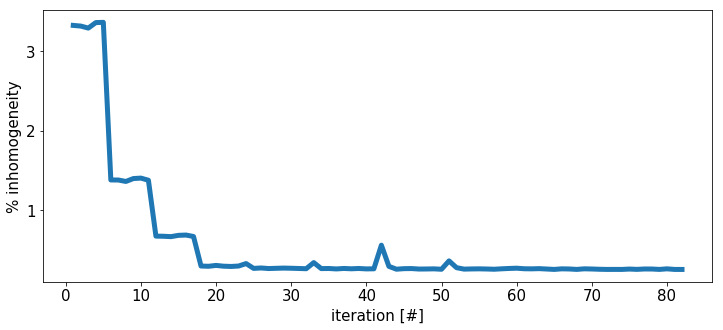

In [15]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(df_opt.Evaluation, np.sqrt(df_opt.Cost)*100, lw = 5)
set_fontsize(ax, 15)
ax.locator_params(axis = 'y', nbins = 5)
ax.set_xlabel('iteration [#]')
ax.set_ylabel('% inhomogeneity');

parameters for which the inhomogeneity is minimized

In [16]:
df_opt.iloc[df_opt.Cost.idxmin()]

Evaluation     82.000000
$R1            36.153259
$R2            62.039052
$SEP           50.123288
$Vsep         802.304316
Cost            0.000006
Name: 81, dtype: float64

## Loading the potential

In [17]:
def load_fld_potential(fname, data_dir = data_dir):
    names = ['x', 'y', 'z', 'V']
    df = pd.read_csv(data_dir+fname, skiprows = 2, header = None, delim_whitespace = True,
                     names = names)
    return df

In [18]:
potential = load_fld_potential('potential_5rods_vacchamber_windows.fld')

In [19]:
potential.head()

,x,y,z,V
0,-0.07,-0.07000,0.0,-256.204962
1,-0.07,-0.06975,0.0,-256.520818
2,-0.07,-0.06950,0.0,-256.836221
3,-0.07,-0.06925,0.0,-257.151171
4,-0.07,-0.06900,0.0,-257.465669


In [33]:
potential.y.min()*1e3

-70.0

## Plotting Potential

In [39]:
def calculate_aspect(x,y):
    return (y.ptp()/x.ptp())/(np.unique(y).size/np.unique(x).size)

In [40]:
def generate_gridded(x, y, data):
    xx, yy = np.meshgrid(np.unique(x), np.unique(y))
    x_vals, x_ind = np.unique(x, return_inverse = True)
    y_vals, y_ind = np.unique(y, return_inverse = True)
    data_array = np.empty(x_vals.shape + y_vals.shape)
    data_array.fill(np.nan)
    data_array[x_ind, y_ind] = data
    return xx, yy, data_array.T

In [41]:
xx, yy, potential_array = generate_gridded(potential.x, 
                                           potential.y, 
                                           potential.V)

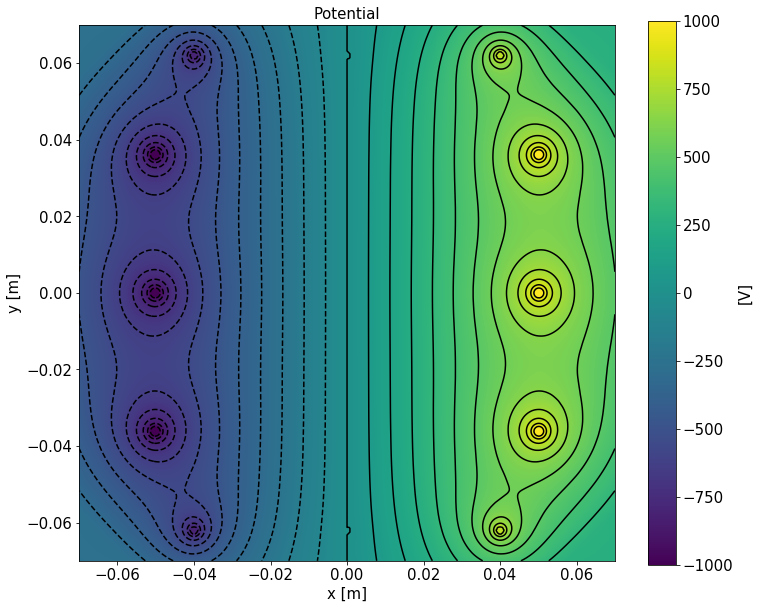

In [42]:
fig, ax = plt.subplots(figsize = (12,10))
ax.set_aspect(calculate_aspect(xx,yy))
pc = ax.pcolormesh(xx, yy, potential_array)
ax.contour(xx,yy,potential_array, 30, colors = 'k')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Potential')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [43]:
xc, yc = np.array(xx.shape)//2

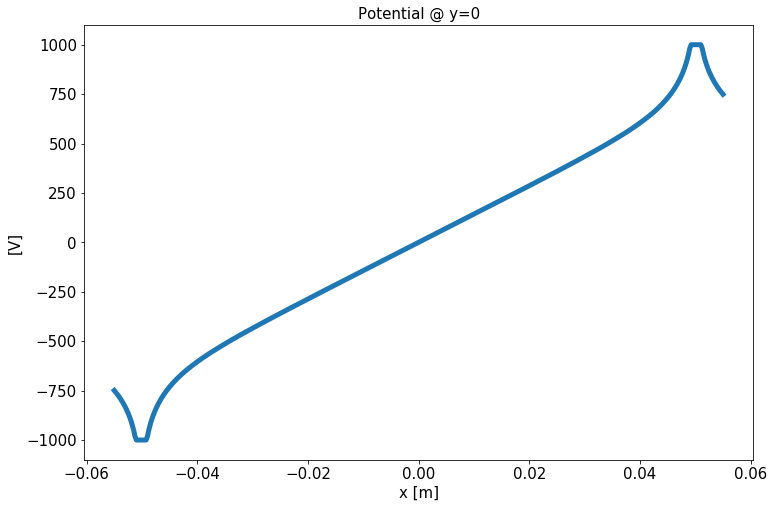

In [44]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title(r'Potential @ y=0')
ax.plot(xx[xc,60:-60], potential_array[xc,60:-60], lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[V]');

## Loading Electric Field

In [45]:
def load_fld_field(fname, data_dir = data_dir):
    names = ['x', 'y', 'z', 'Ex', 'Ey', 'Ez']
    df = pd.read_csv(data_dir+fname, skiprows = 2, header = None, 
                     delim_whitespace = True, names = names)
    return df

In [46]:
field = load_fld_field('field_5rods_vacchamber_windows.fld')
field.head()

,x,y,z,Ex,Ey,Ez
0,-0.07,-0.07000,0.0,966.744246,1266.595954,0.0
1,-0.07,-0.06975,0.0,997.399045,1264.470752,0.0
2,-0.07,-0.06950,0.0,1027.978582,1262.311495,0.0
3,-0.07,-0.06925,0.0,1058.482856,1260.118181,0.0
4,-0.07,-0.06900,0.0,1088.911869,1257.890811,0.0


## Generating Gridded Field

In [47]:
xx, yy, Ex = generate_gridded(field.x.values, 
                              field.y.values, 
                              field.Ex.values)
_, _, Ey = generate_gridded(field.x.values, 
                            field.y.values, 
                            field.Ey.values)
Emag = np.sqrt(Ex**2+Ey**2)

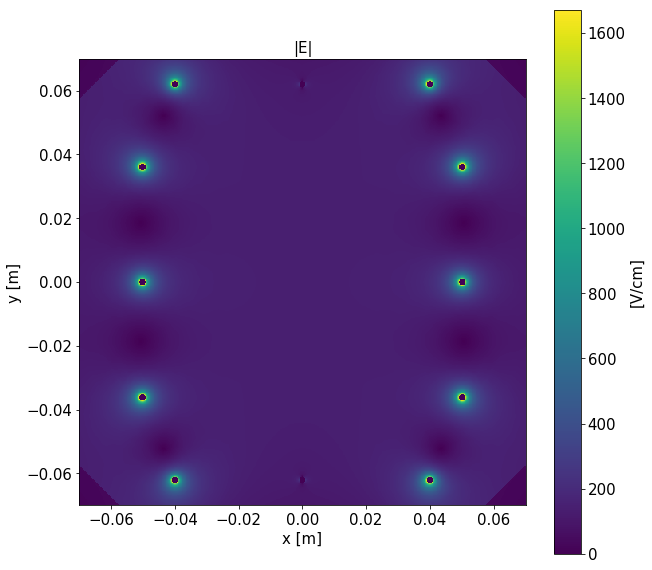

In [48]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect(calculate_aspect(xx,yy))
pc = ax.pcolormesh(xx, yy, Emag/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('|E|')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [49]:
xc, yc = np.array(xx.shape)//2

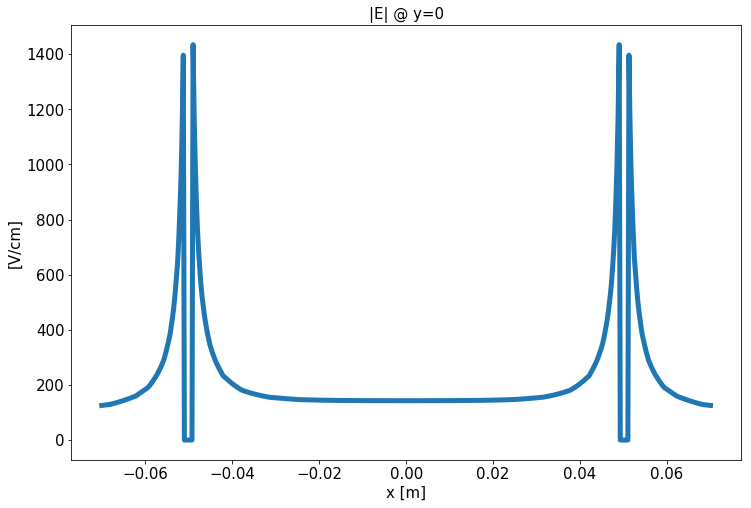

In [50]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title(r'|E| @ y=0')
ax.plot(xx[xc,:], Emag[xc,:]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[V/cm]');

## Zooming to beam region

In [61]:
potential_center = load_fld_potential('potential_5rods_vacchamber_windows_center.fld')
field_center = load_fld_field('field_5rods_vacchamber_windows_center.fld')

In [62]:
xx, yy, potential_array = generate_gridded(potential_center.x, 
                                           potential_center.y, 
                                           potential_center.V)

In [63]:
xx, yy, Ex = generate_gridded(field_center.x.values, 
                              field_center.y.values, 
                              field_center.Ex.values)
_, _, Ey = generate_gridded(field_center.x.values, 
                            field_center.y.values, 
                            field_center.Ey.values)
Emag = np.sqrt(Ex**2+Ey**2)

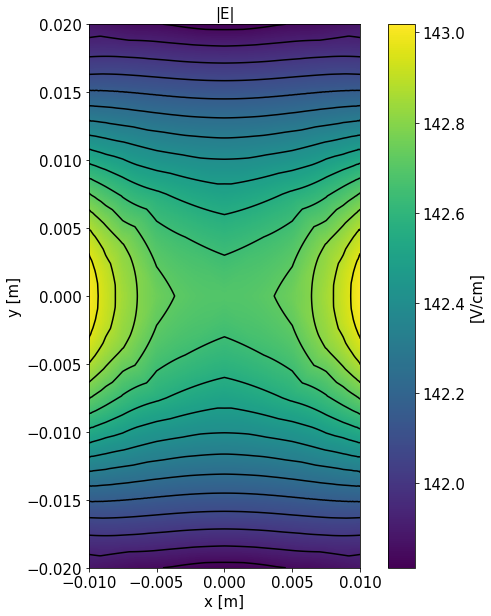

In [64]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Emag/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Emag, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('|E|')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

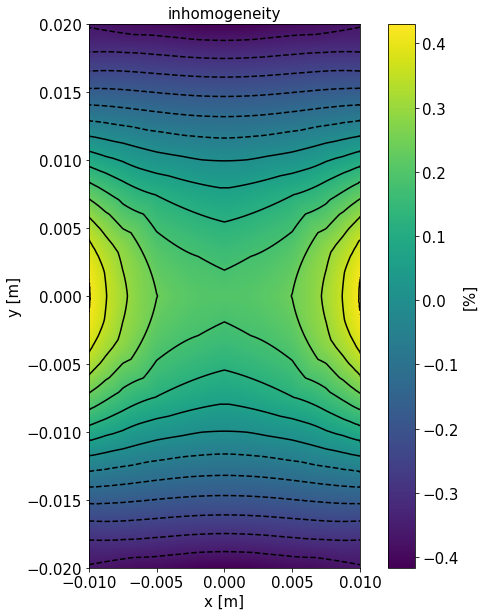

In [65]:
inhomogeneity = 100*(Emag-Emag.mean())/Emag.mean()
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, inhomogeneity)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,inhomogeneity, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('inhomogeneity')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[%]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

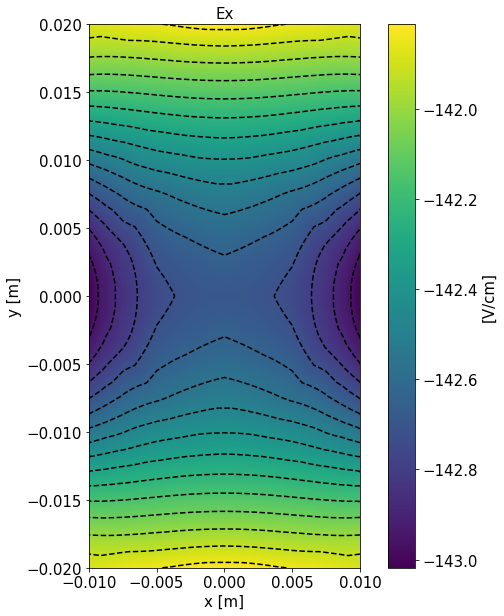

In [66]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Ex/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Ex, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('Ex')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

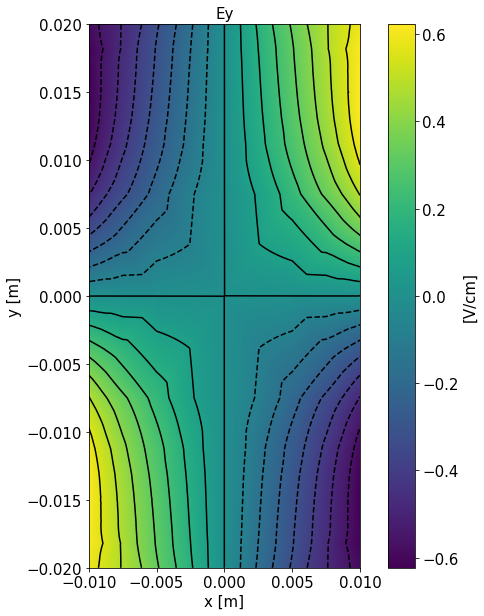

In [67]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Ey/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Ey, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('Ey')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [95]:
xc, yc = np.array(xx.shape)//2

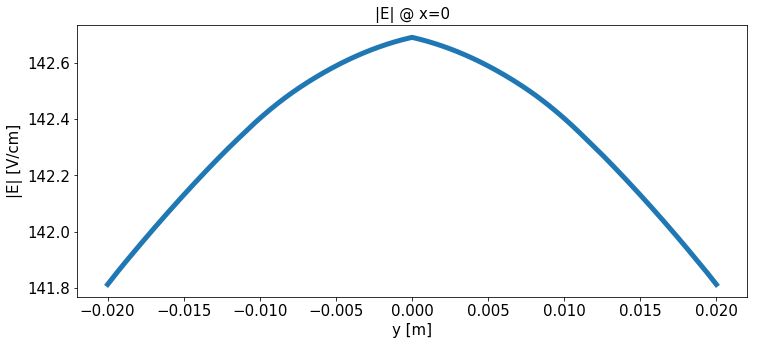

In [96]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'|E| @ x=0')
ax.plot(yy[:,yc], Emag[:,yc]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('y [m]')
ax.set_ylabel('|E| [V/cm]');

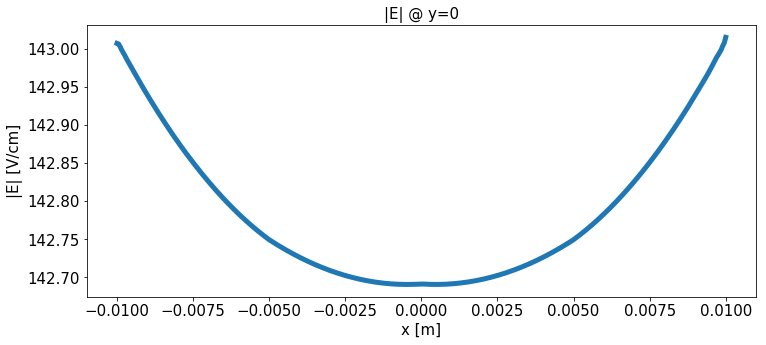

In [97]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'|E| @ y=0')
ax.plot(xx[xc,:], Emag[xc,:]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('|E| [V/cm]');